In [2]:
#Project Title: Residential Real Estate Market Price Prediction BY DAVID
#In this project, the objective is to accurately determine the market 
#price of residential properties by analyzing various features such as 
#square footage, number of bedrooms, number of floors, and other relevant 
#attributes. This analysis and prediction will assist the Real Estate Investment 
#Trust in making informed investment decisions.

In [3]:
#King County house sale prices (Seattle area) from May 2014 to May 2015, slightly modified.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [6]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [7]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
#Question 1
#Display the data types of each column using the function dtypes, 
#---then take a screenshot and submit it, include your code in the image.

print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [9]:
#Overview of the dataset
df.describe()
summary = df.describe()
print(summary)

        Unnamed: 0            id         price      bedrooms     bathrooms  \
count  21613.00000  2.161300e+04  2.161300e+04  21600.000000  21603.000000   
mean   10806.00000  4.580302e+09  5.400881e+05      3.372870      2.115736   
std     6239.28002  2.876566e+09  3.671272e+05      0.926657      0.768996   
min        0.00000  1.000102e+06  7.500000e+04      1.000000      0.500000   
25%     5403.00000  2.123049e+09  3.219500e+05      3.000000      1.750000   
50%    10806.00000  3.904930e+09  4.500000e+05      3.000000      2.250000   
75%    16209.00000  7.308900e+09  6.450000e+05      4.000000      2.500000   
max    21612.00000  9.900000e+09  7.700000e+06     33.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean    2079.899736  1.510697e+04      1.494309      0.007542      0.234303   
std      918.440897  4.142051e+04      0.539989      0.08651

In [10]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

In [11]:
summary = df.describe()
print(summary)

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [12]:
#Question 2------------Drop the columns "id" and "Unnamed: 0" from axis 1 
#using the method drop(), then use the method describe() to obtain a statistical
#summary of the data. Take a screenshot and submit it, make sure the inplace 
#parameter is set to True

In [13]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [14]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

/var/folders/b7/qm354wp578zc04vwg8_4shxh0000gn/T/ipykernel_53967/4091211281.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan,mean, inplace=True)


In [15]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

/var/folders/b7/qm354wp578zc04vwg8_4shxh0000gn/T/ipykernel_53967/1207139423.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].replace(np.nan,mean, inplace=True)


In [16]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [17]:
#simple way to clear null cells

In [18]:
floor_counts = df['floors'].value_counts().to_frame()
floor_counts.columns = ['count']
print(floor_counts)

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


In [19]:
#Question 3-------- Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe. 

In [20]:
#Question 4---------Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.

<Axes: xlabel='waterfront', ylabel='price'>

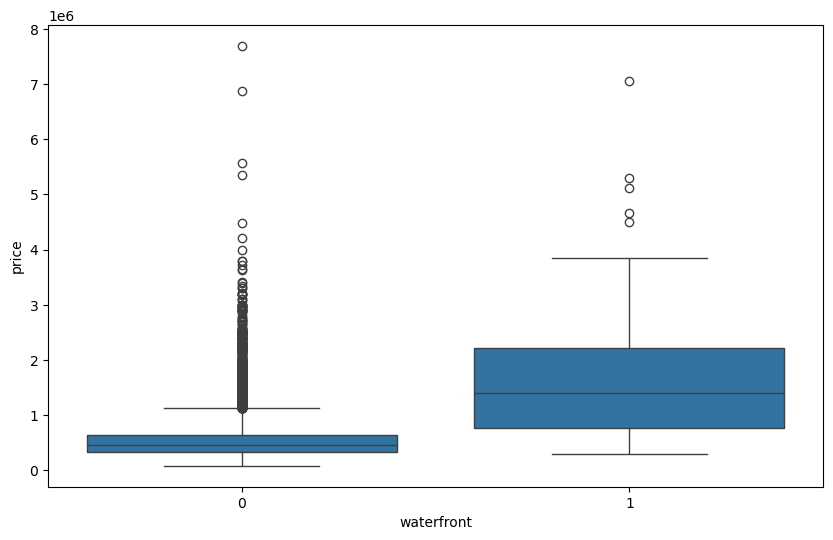

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)

Text(0, 0.5, 'Price')

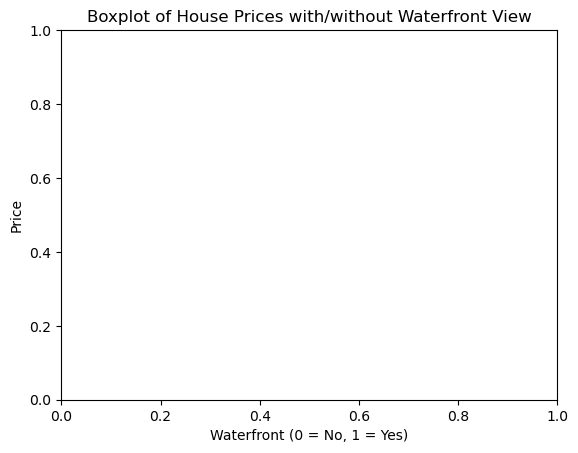

In [22]:
plt.title('Boxplot of House Prices with/without Waterfront View')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Price')

In [24]:
plt.show()

In [25]:
#Question 5----------------Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

<Axes: xlabel='sqft_above', ylabel='price'>

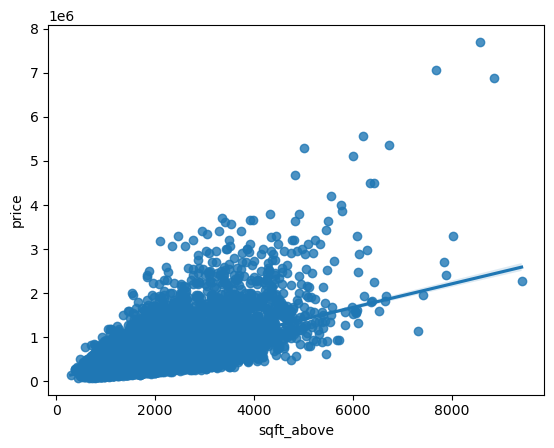

In [26]:
sns.regplot(x='sqft_above', y='price', data=df)

In [28]:
## Model Developement
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [29]:
lm = LinearRegression()
lm.fit(X, Y)
r_squared = lm.score(X, Y)
print(f'R^2 value: {r_squared}')

R^2 value: 0.00046769430149007363


In [30]:
#Question 6-------------Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2.

In [31]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [32]:
X = df[features]
Y = df['price']

In [33]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [34]:
print("Coefficients:", lm.coef_)

Coefficients: [-3.15405403e+04  6.08046940e+05  6.72836620e+05 -2.62403356e+04
 -1.87931219e+15  6.69771667e+04 -3.15147709e+03  5.11800346e+00
 -1.87931219e+15  8.20267115e+04  1.87931219e+15]


In [35]:
print("Intercept:", lm.intercept_)

Intercept: -32378439.85823347


In [37]:
#QUESTION 7-----------Fit a linear regression model to predict the 'price' using the list of features:

In [38]:
#QUESTION 8---------Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.

In [39]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [41]:
estimators = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression()) 
]

In [42]:
pipeline = Pipeline(estimators)

In [43]:
pipeline.fit(X, Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [44]:
r_squared = pipeline.score(X, Y)

In [45]:
print(f'R^2 value: {r_squared}')

R^2 value: 0.7513409199130776


In [46]:
#Model Evaluation and Refinement
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [47]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [48]:
#Question 9-------------Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

In [49]:
from sklearn.linear_model import Ridge

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

In [51]:
print("number of test samples:", x_test.shape[0])
print("number of training samples:", x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [52]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.1)

In [53]:
r_squared = ridge_model.score(x_test, y_test)
print(f'R^2 value: {r_squared}')

R^2 value: 0.6478759163939113


In [54]:
#QUESTION 10---------Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided.

In [55]:
pipeline = Pipeline([
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=0.1))
])

In [56]:
pipeline.fit(x_train, y_train)


Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('ridge', Ridge(alpha=0.1))])

In [57]:
r_squared = pipeline.score(x_test, y_test)

In [58]:
print(f'R^2 value: {r_squared}')

R^2 value: 0.7002744274256167


In [ ]:
#THANK YOU.